In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import requests
from io import BytesIO

In [23]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix');
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed'])
    plt.show()

In [24]:
URL1 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
URL2 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv"

resp1 = requests.get(URL1)
resp2 = requests.get(URL2)

text1 = BytesIO(resp1.content)
text2 = BytesIO(resp2.content)

data = pd.read_csv(text1)
X = pd.read_csv(text2)

In [25]:
#Create a NumPy array from the column Class in data, by applying the method to_numpy() then assign it to the variable Y,
#make sure the output is a Pandas series (only one bracket df['name of column']).

In [26]:
Y = data['Class'].to_numpy()

In [27]:
transform = preprocessing.StandardScaler()

In [28]:
X = transform.fit_transform(X)

In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [30]:
Y_test.shape

(18,)

# Logistic Regresion

In [31]:
parameters ={'C':[0.01,0.1,1],
             'penalty':['l2'],
             'solver':['lbfgs']}

In [32]:
lr=LogisticRegression()

In [33]:
logreg_cv = GridSearchCV(estimator=lr, param_grid=parameters, cv=10)
logreg_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs']})

In [34]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.8464285714285713


In [35]:
logreg_cv.score(X_test, Y_test)

0.8333333333333334

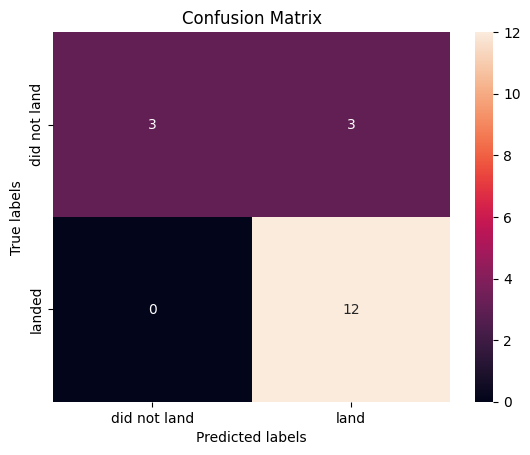

In [36]:
yhat_log=logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat_log)

# SVM

In [37]:
parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}
svm = SVC()


In [38]:
svm_cv = GridSearchCV(svm, parameters, cv=10)

In [39]:
svm_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'gamma': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'kernel': ('linear', 'rbf', 'poly', 'rbf', 'sigmoid')})

In [40]:
print("Tuned hyperparameters (best parameters):", svm_cv.best_params_)
print("Accuracy:", svm_cv.best_score_)

Tuned hyperparameters (best parameters): {'C': 1.0, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'}
Accuracy: 0.8482142857142856


In [41]:
svm_cv.score(X_test, Y_test)

0.8333333333333334

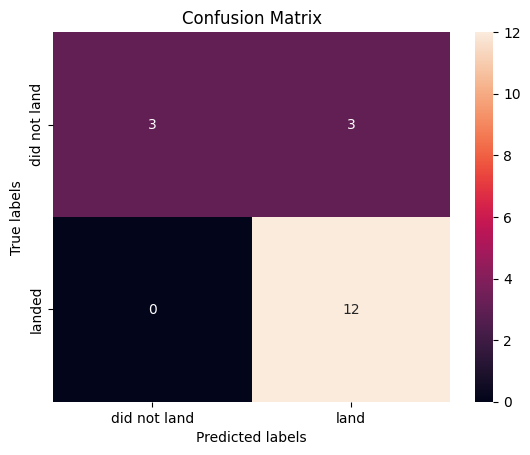

In [42]:
yhat_svm=svm_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat_svm)

# Decision tree

In [43]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()

In [44]:
tree_cv = GridSearchCV(tree, parameters, cv=10)
tree_cv.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
3240 fits failed out of a total of 6480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3240 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/u

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [45]:
print("Tuned hyperparameters (best parameters):", tree_cv.best_params_)
print("Accuracy:", tree_cv.best_score_)

Tuned hyperparameters (best parameters): {'criterion': 'gini', 'max_depth': 6, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'splitter': 'random'}
Accuracy: 0.8625


In [46]:
tree_cv.score(X_test, Y_test)

0.8333333333333334

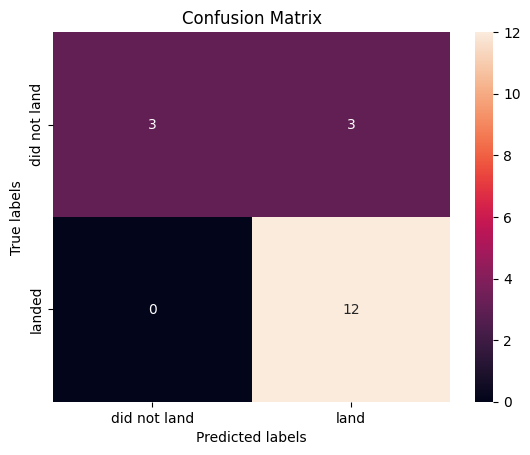

In [47]:
yhat_tree = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat_tree)

In [48]:
parameters = {
    'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]
}

KNN = KNeighborsClassifier()

knn_cv = GridSearchCV(KNN, parameters, cv=10)

knn_cv.fit(X_train, Y_train)

print("Tuned hyperparameters (best parameters):", knn_cv.best_params_)
print("Accuracy:", knn_cv.best_score_)

Tuned hyperparameters (best parameters): {'algorithm': 'auto', 'n_neighbors': 10, 'p': 1}
Accuracy: 0.8482142857142858


In [49]:
knn_cv.score(X_test, Y_test)

0.8333333333333334

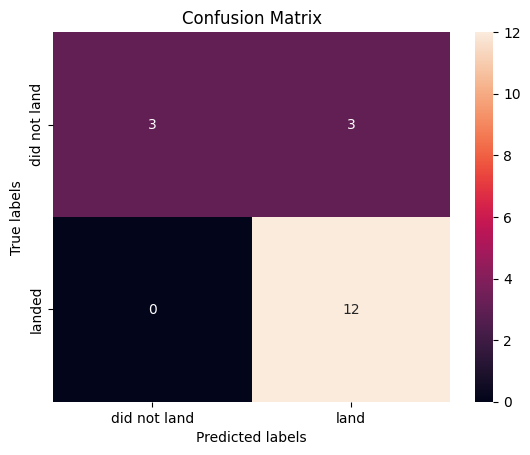

In [50]:
yhat_knn = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat_knn)

In [51]:
from sklearn.metrics import accuracy_score, f1_score

logreg_pred = logreg_cv.predict(X_test)
svm_pred = svm_cv.predict(X_test)
tree_pred = tree_cv.predict(X_test)
knn_pred = knn_cv.predict(X_test)

logreg_accuracy = accuracy_score(Y_test, logreg_pred)
svm_accuracy = accuracy_score(Y_test, svm_pred)
tree_accuracy = accuracy_score(Y_test, tree_pred)
knn_accuracy = accuracy_score(Y_test, knn_pred)

# Calculate F1 Score for each model
logreg_f1 = f1_score(Y_test, logreg_pred, average='weighted')
svm_f1 = f1_score(Y_test, svm_pred, average='weighted')
tree_f1 = f1_score(Y_test, tree_pred, average='weighted')
knn_f1 = f1_score(Y_test, knn_pred, average='weighted')

# Display the comparison
print(f"Logistic Regression - Accuracy: {logreg_accuracy}, F1: {logreg_f1}")
print(f"SVM - Accuracy: {svm_accuracy}, F1: {svm_f1}")
print(f"Decision Tree - Accuracy: {tree_accuracy}, F1: {tree_f1}")
print(f"KNN - Accuracy: {knn_accuracy}, F1: {knn_f1}")

Logistic Regression - Accuracy: 0.8333333333333334, F1: 0.8148148148148148
SVM - Accuracy: 0.8333333333333334, F1: 0.8148148148148148
Decision Tree - Accuracy: 0.8333333333333334, F1: 0.8148148148148148
KNN - Accuracy: 0.8333333333333334, F1: 0.8148148148148148


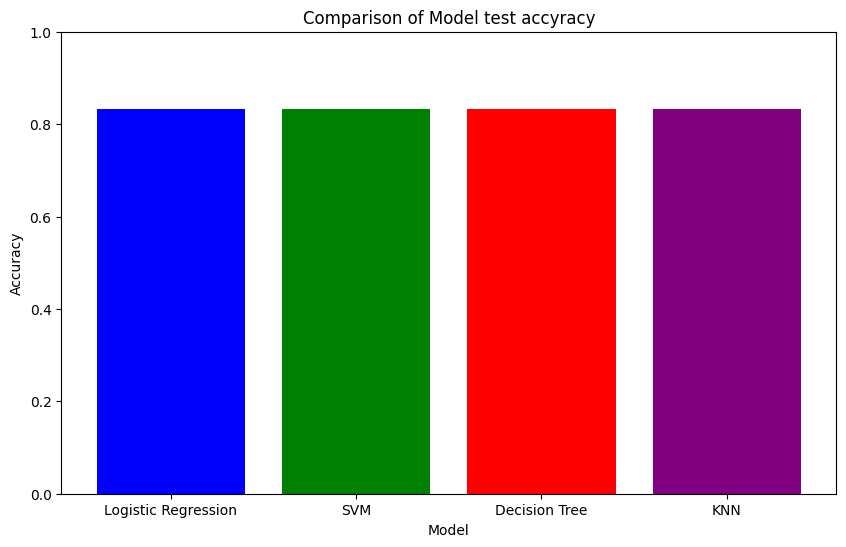

In [52]:
model_names = ['Logistic Regression', 'SVM', 'Decision Tree', 'KNN']
accuracies = [logreg_accuracy, svm_accuracy, tree_accuracy, knn_accuracy]

# Create a DataFrame
df_accuracy = pd.DataFrame({
    'Model': model_names,
    'Accuracy': accuracies
})

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(df_accuracy['Model'], df_accuracy['Accuracy'], color=['blue', 'green', 'red', 'purple'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Comparison of Model test accyracy')
plt.ylim(0, 1)  # To ensure the accuracy scale goes from 0 to 1
plt.show()

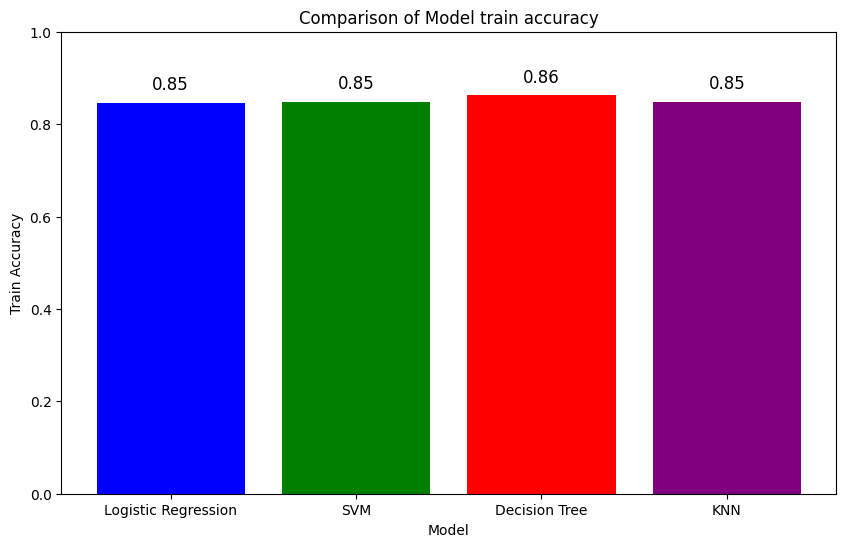

In [59]:
model_names = ['Logistic Regression', 'SVM', 'Decision Tree', 'KNN']
accuracies = [logreg_cv.best_score_, svm_cv.best_score_, tree_cv.best_score_, knn_cv.best_score_]

# Create a DataFrame
df_accuracy = pd.DataFrame({
    'Model': model_names,
    'Train Accuracy': accuracies
})

# Plotting the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(df_accuracy['Model'], df_accuracy['Train Accuracy'], color=['blue', 'green', 'red', 'purple'])
plt.xlabel('Model')
plt.ylabel('Train Accuracy')
plt.title('Comparison of Model train accuracy')
plt.ylim(0, 1)  # To ensure the accuracy scale goes from 0 to 1

for bar in bars:
    yval = bar.get_height()  # Get the height of the bar (accuracy value)
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.02,  # Position of text
             f'{yval:.2f}',  # Display value with 2 decimal places
             ha='center', va='bottom', fontsize=12)  # Horizontal and vertical alignment of text


plt.show()